# An easy way to train image recognition classifier for almost anything in 5 steps

Checkout the code for this project on my GitHub, including image-scraper. The link for interractive demo is there.

# STEP 1

Spinning up an instance on Paperspace.com

Paperspa


OS UBUNTU 16

We made instance on Paperspace
We found tool: https://github.com/rushilsrivastava/image-scrappers which helps to scrape google images for particular search parameters. It uses selenium. 
Insttallation of chrome driver may be challenging this bash file helps: https://gist.github.com/ziadoz/3e8ab7e944d02fe872c3454d17af31a5
We neet do decide how to 



# STEP 2

Scraping google photos to get images 

We found an amazing tool: https://github.com/rushilsrivastava/image-scrappers which helps to scrape google images for particular search parameters. It uses selenium to programmatically scroll the web page and collect all the images for particular querry and downloads them to selected folder on your computer.

Insttallation of chrome driver may be challenging this bash file helps: https://gist.github.com/ziadoz/3e8ab7e944d02fe872c3454d17af31a5

# STEP 3

Next we need to clean our data. (Get reed of u

# STEP 4

Training classifier

# STEP 5

Visualizing results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras as K
import h5py
from keras.applications.vgg16 import VGG16
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Dropout
from keras import optimizers

Using TensorFlow backend.


In [2]:
K.__version__

'2.0.5'

In [3]:
from dataset.load import load_dataset

In [4]:
dataset = load_dataset()

In [5]:
dataset['train'][0][0].shape

(256, 256, 3)

#### Next we load VGG16 model pretrined in imagenet

In [6]:
# build the VGG16 network
model = VGG16(weights='imagenet', include_top=False, input_shape = (256,256,3))
last = model.output
print('Model loaded.')

Model loaded.


In [7]:
x = Flatten(input_shape=model.output_shape[1:])(last)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)

In [8]:
model = Model(model.input, output)

In [9]:
model.layers

In [10]:
# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:20]:
    layer.trainable = False

In [11]:
# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [12]:
X_train = dataset['train'][0]
dataset

{'test': [array([[[[255, 255, 255],
           [255, 255, 255],
           [255, 255, 255],
           ..., 
           [255, 255, 255],
           [255, 255, 255],
           [255, 255, 255]],
  
          [[255, 255, 255],
           [255, 255, 255],
           [255, 255, 255],
           ..., 
           [255, 255, 255],
           [255, 255, 255],
           [255, 255, 255]],
  
          [[255, 255, 255],
           [255, 255, 255],
           [255, 255, 255],
           ..., 
           [255, 255, 255],
           [255, 255, 255],
           [255, 255, 255]],
  
          ..., 
          [[249, 249, 252],
           [249, 249, 252],
           [249, 249, 252],
           ..., 
           [249, 249, 252],
           [249, 249, 252],
           [249, 249, 252]],
  
          [[241, 242, 250],
           [241, 242, 250],
           [241, 242, 250],
           ..., 
           [241, 242, 250],
           [241, 242, 250],
           [241, 242, 250]],
  
          [[238, 240, 252],
   

In [13]:
y_train = np.eye(4)[dataset['train'][1]]
y_train.shape

(2309, 4)

In [14]:
X_val = dataset['val'][0]
y_val = np.eye(4)[dataset['val'][1]]

In [15]:
history = model.fit(X_train,
          y_train,
          batch_size=64,
          epochs=1,
          shuffle=True,
          verbose=1,
          validation_data = (X_val, y_val)
          )

Train on 2309 samples, validate on 289 samples
Epoch 1/1
2309/2309 [==============================] - 52s - loss: 3.8895 - acc: 0.6932 - val_loss: 6.5466 - val_acc: 0.5009


dict_keys(['val_loss', 'loss', 'val_acc', 'acc'])


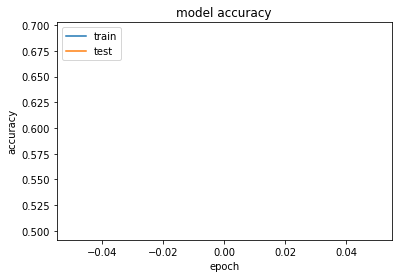

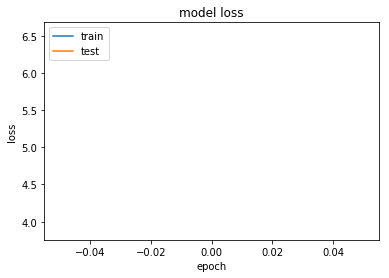

In [16]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [17]:
pred = np.argmax(model.predict(X_val), axis=1)
pred

array([0, 1, 0, 0, 0, 1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 2,
       0, 2, 0, 0, 2, 1, 2, 1, 0, 1, 0, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 1,
       0, 2, 2, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0,
       0, 1, 1, 2, 1, 0, 1, 1, 0, 2, 2, 0, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 2,
       0, 1, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 0,
       2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1,
       1, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2,
       0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2,
       1, 0, 2, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 2, 1, 1, 0, 2, 0, 2, 2, 1,
       1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 0, 2, 2,
       0, 2, 1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0])

In [18]:
y_val = dataset['val'][1]

In [19]:
y_val


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [20]:
from confusion_matrix import plot_confusion_matrix
import itertools

Confusion matrix, without normalization
[[  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [ 93  84 112   0]]


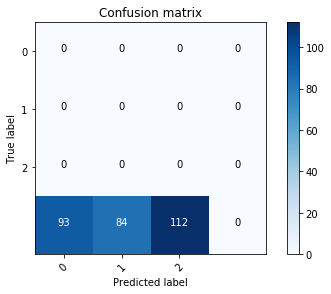

In [21]:
plot_confusion_matrix(y_test=y_val, y_pred=pred, classes=range(3))